In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
pd.set_option('mode.chained_assignment', None)

In [67]:
sla = pd.read_csv("/media/rajat/01D6F7B2FC2FF8D0/UGP/datasets/sla.csv",index_col = 0)

precip = pd.read_csv("/media/rajat/01D6F7B2FC2FF8D0/UGP/datasets/precip.csv",index_col = 0)
precip = precip.iloc[:-3]
precip.drop(["time"],axis =1,inplace =True)

col = np.arange(13)
enso = pd.DataFrame(np.loadtxt("/media/rajat/01D6F7B2FC2FF8D0/UGP/datasets/oni.txt"),columns=col).set_index(0).stack()
enso = pd.DataFrame(enso).rename(columns = {0:"oni"})
enso = enso.reset_index().rename(columns = {0:"year","level_1":"month"})
enso = enso[(enso["year"] > 1992) & (enso["year"] <= 2019)]
enso = enso[:-3]
precip

,r1,r2,r3,r4
0,163.73653,1.633409,118.10749,0.00000
1,528.27760,1931.315300,5931.45560,0.00000
2,7129.06740,3857.536900,4042.73120,0.00000
3,15135.64800,4580.593800,5394.87000,0.00000
4,22333.06000,10356.710000,15049.10700,0.00000
...,...,...,...,...
4,25152.49000,4280.221700,4445.79350,0.00000
5,27915.93800,85676.130000,7777.13430,297.56958
6,53704.84000,246462.450000,18832.35400,744.02860
7,78710.12500,297832.280000,6096.22270,2604.60900


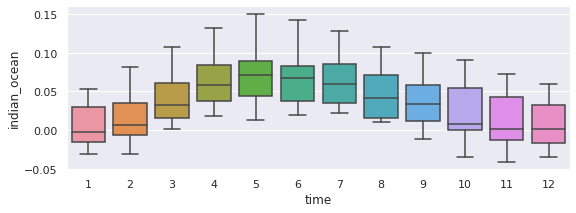

In [47]:
plt.figure(figsize=(9,3))
sns.boxplot(x = pd.DatetimeIndex(sla['time']).month , y = "indian_ocean", data =sla)

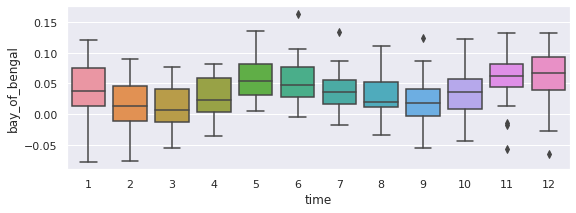

In [48]:
plt.figure(figsize=(9,3))
sns.boxplot(x = pd.DatetimeIndex(sla['time']).month , y = "bay_of_bengal", data =sla)

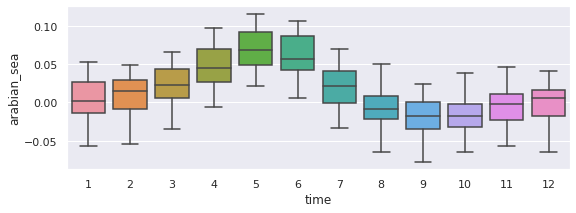

In [49]:
plt.figure(figsize=(9,3))
sns.boxplot(x = pd.DatetimeIndex(sla['time']).month , y = "arabian_sea", data =sla)

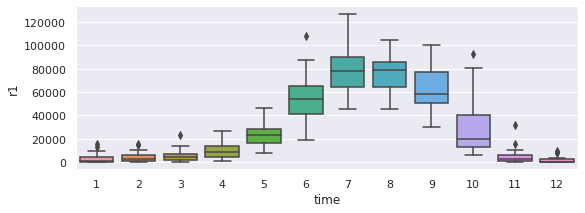

In [50]:
plt.figure(figsize=(9,3))
sns.boxplot(x = pd.DatetimeIndex(precip['time']).month , y = "r1",data =precip)

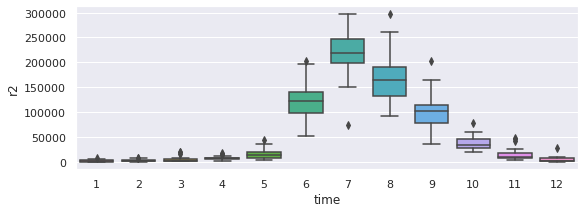

In [51]:
plt.figure(figsize=(9,3))
sns.boxplot(x = pd.DatetimeIndex(precip['time']).month , y = "r2",data =precip)

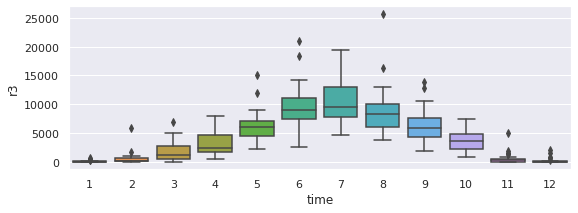

In [52]:
plt.figure(figsize=(9,3))
sns.boxplot(x = pd.DatetimeIndex(precip['time']).month , y = "r3",data =precip)

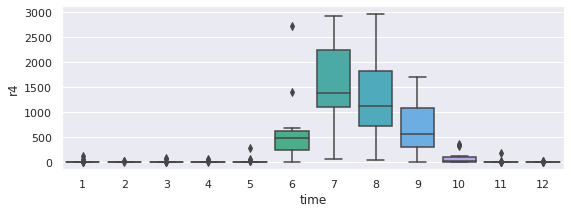

In [53]:
plt.figure(figsize=(9,3))
sns.boxplot(x = pd.DatetimeIndex(precip['time']).month , y = "r4",data =precip)

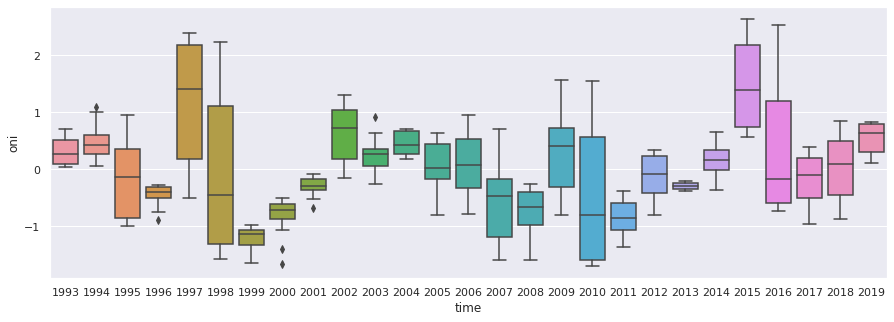

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(x = pd.DatetimeIndex(precip['time']).year , y = "oni",data =enso)

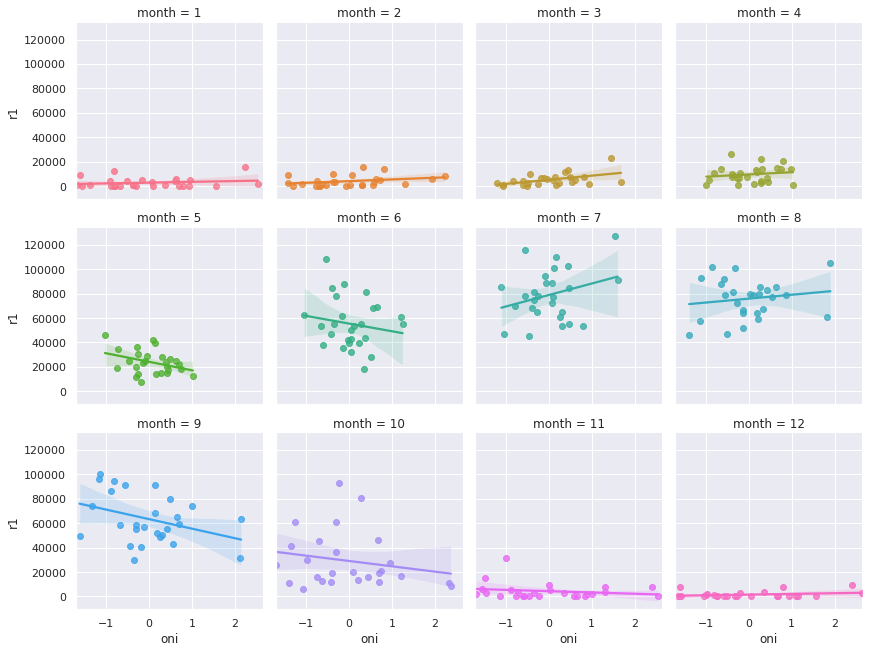

In [68]:
df = pd.concat([precip.reset_index(),sla.reset_index(),enso.reset_index()],1)
sns.lmplot(x = "oni",y = "r1" , data = df , col = "month" , hue ="month" , col_wrap=4, height=3)

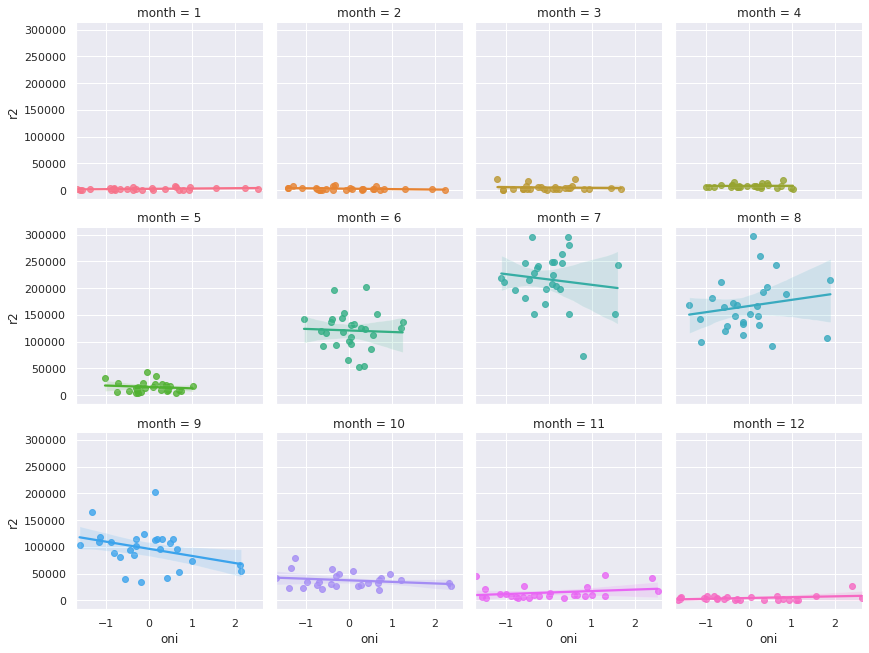

In [69]:
sns.lmplot(x = "oni",y = "r2" , data = df , col = "month" , hue ="month" , col_wrap=4, height=3)

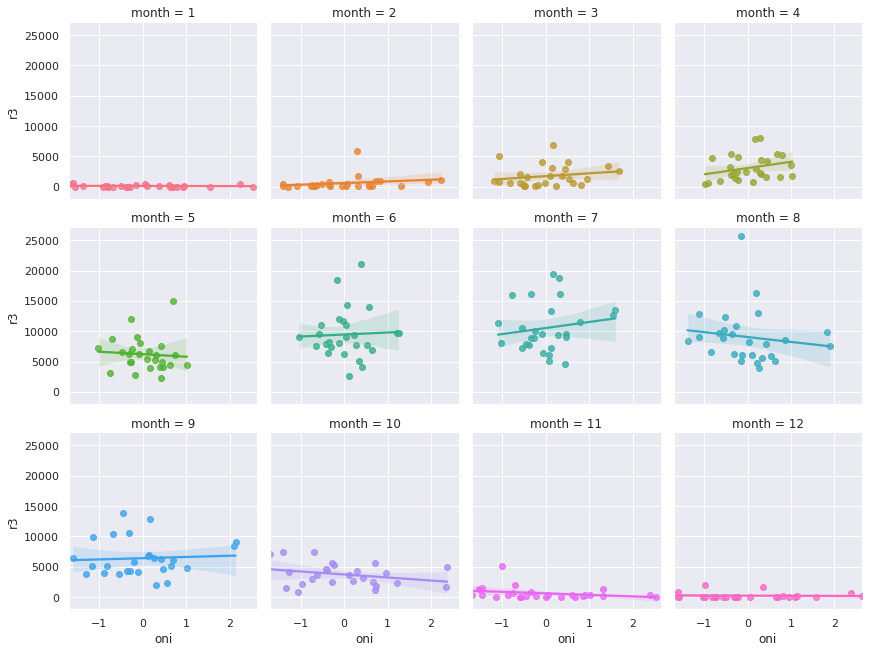

In [70]:
sns.lmplot(x = "oni",y = "r3" , data = df , col = "month" , hue ="month" , col_wrap=4, height=3)

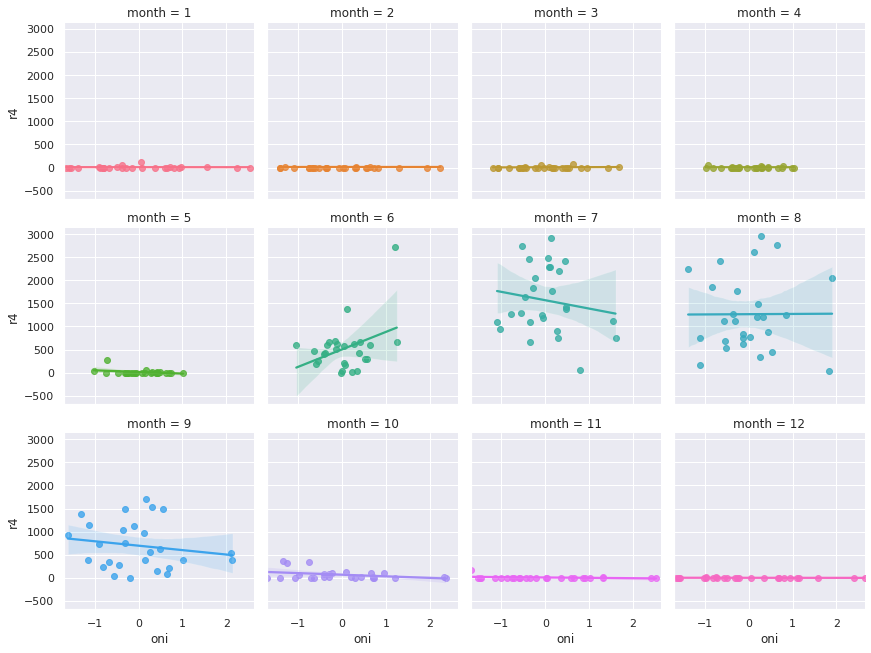

In [71]:
sns.lmplot(x = "oni",y = "r4" , data = df , col = "month" , hue ="month" , col_wrap=4, height=3)

In [72]:
df["r1"] = df["r1"].groupby(pd.DatetimeIndex(df['time']).month)#.transform(lambda x: (x - x.mean()) / x.std())
sns.jointplot(y=df["r1"],x=df["arabian_sea"], alpha=.3)

ValueError: Length of values (12) does not match length of index (321)

In [64]:
df.drop([1])

,index,time,r1,r2,r3,r4,index,time,indian_ocean,arabian_sea,bay_of_bengal,index,year,month,oni
0,0,1993-01-31,163.73653,1.633409,118.10749,0.00000,0,1993-01-01,-0.009416,0.033238,0.004194,516,1993.0,1,0.09
2,2,1993-03-31,7129.06740,3857.536900,4042.73120,0.00000,2,1993-03-01,0.003760,0.038802,-0.055315,518,1993.0,3,0.50
3,3,1993-04-30,15135.64800,4580.593800,5394.87000,0.00000,3,1993-04-01,0.030399,0.053378,-0.030601,519,1993.0,4,0.67
4,4,1993-05-31,22333.06000,10356.710000,15049.10700,0.00000,4,1993-05-01,0.036380,0.075841,0.010317,520,1993.0,5,0.70
5,5,1993-06-30,68007.23400,112136.290000,14022.59600,289.88635,5,1993-06-01,0.036574,0.057016,0.011654,521,1993.0,6,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,4,2019-05-31,25152.49000,4280.221700,4445.79350,0.00000,316,2019-05-01,0.111331,0.021061,0.078476,832,2019.0,5,0.63
317,5,2019-06-30,27915.93800,85676.130000,7777.13430,297.56958,317,2019-06-01,0.110064,0.018416,0.081854,833,2019.0,6,0.52
318,6,2019-07-31,53704.84000,246462.450000,18832.35400,744.02860,318,2019-07-01,0.122683,-0.011823,0.085912,834,2019.0,7,0.30
319,7,2019-08-31,78710.12500,297832.280000,6096.22270,2604.60900,319,2019-08-01,0.106077,-0.034785,0.067046,835,2019.0,8,0.11


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          321 non-null    int64  
 1   time           321 non-null    object 
 2   r1             321 non-null    float64
 3   r2             321 non-null    float64
 4   r3             321 non-null    float64
 5   r4             321 non-null    float64
 6   index          321 non-null    int64  
 7   time           321 non-null    object 
 8   indian_ocean   321 non-null    float64
 9   arabian_sea    321 non-null    float64
 10  bay_of_bengal  321 non-null    float64
 11  index          321 non-null    int64  
 12  year           321 non-null    float64
 13  month          321 non-null    int64  
 14  oni            321 non-null    float64
dtypes: float64(9), int64(4), object(2)
memory usage: 37.7+ KB
